In [1]:
import shapefile
import shapely.geometry
import random
import dbfread

random.seed(42)

Inicialmente, lemos os arquivos obtidos do GeoSampa. Os arquivos SHP possuem o polígono no padrão SIRGAS, enquanto o arquivo DBF contêm metadados sobre os distritos

In [2]:
sf = shapefile.Reader("data/polygons/LAYER_DISTRITO/DEINFO_DISTRITO_SIRGAS")
dbf = dbfread.DBF("data/polygons/LAYER_DISTRITO/DEINFO_DISTRITO_SIRGAS.dbf")

districts = {}
for i, record in enumerate(dbf):
    districts[int(record["COD_DIST"])] = {
        "POS" : i, #Position of the district on the shapefile
        "NAME" : record["NOME_DIST"]
    }


Testando um dos distritos

JACANA


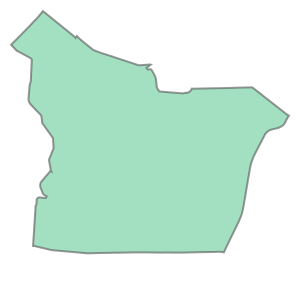

In [3]:
i = 39

shape = sf.shapes()[i]
print(districts[i]["NAME"])
shapely.geometry.shape(shape)

In [9]:
import utm

UTM_REGION_1 = 23
UTM_REGION_2 = "K"

def generate_coordinates(shape,n=100):
    "Generate random points inside a geometric shape"
    sh = shapely.geometry.shape(shape)
    ret = []
    x_min, y_min, x_max, y_max = tuple(map(float,shape.bbox))
    while len(ret) < n:
        pt_x = x_min+random.uniform(0,1)*(x_max-x_min)
        pt_y = y_min+random.uniform(0,1)*(y_max-y_min)
        pt = shapely.geometry.Point(pt_x,pt_y)
        if sh.contains(pt):
            ret.append(pt)        
    return ret

def populate_region(shape, n=100):
    "Generate random (Lat,Long) points inside a region"
    points_utm = generate_coordinates(shape)
    return list(map(
        lambda point: utm.to_latlon(point.x, point.y,UTM_REGION_1,UTM_REGION_2),
        points_utm
    ))

def populate_map(sf, districts, n=100):
    ret = {}
    for did, district in districts.items():
        shape = sf.shapes()[district["POS"]]
        points = populate_region(shape,n)
        ret[did] = points
    return ret
        
district_points = populate_map(sf,districts)


In [10]:
import os
import mapretrieve 

OUTPUT_PATH = r"./images"

for did in range(1,36):
    district_points.pop(did)

print(district_points.keys())
    
for did, points in district_points.items():
    district_path = os.path.join(OUTPUT_PATH,str(did))
    if not os.path.exists(district_path):
        os.makedirs(district_path)
    for fid, geo in enumerate(points):
        address = "{lat}, {long}".format(lat=geo[0], long=geo[1])
        gmaps2.retrieve_address(fid, address, output_path=district_path, imsize=(800,800), headings=range(0,360,60))

dict_keys([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])


KeyboardInterrupt: 